
# Fit Pixel

In this notebook we will fit a single pixel in a data cube for NGC628.

#### * If you have not yet downloaded the sample data cube, uncomment the below cell and run and download the sample data cube.  
This will save a 900MB file called `sample_data.hdf5` to the **`ExampleData`** directory in the **`LUCI`** folder. Do not be concerned if it takes a few minutes to download. The data is of low quality, so the fits will not be good -- this cube is just for demonstrative purposes.

In [1]:
# !wget -O Data/NGC628_SN3.hdf5  https://ws.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/data/pub/CFHT/2307000z.hdf5?RUNID=xc9le6u8llecp7fp

In [2]:
# Imports
import os
import sys

import numpy as np
import matplotlib.pyplot as plt

# Get location of LUCI 
path = os.path.abspath(os.path.pardir)  
sys.path.insert(0, path)  # add LUCI to the available paths

from LuciBase import Luci
import LUCI.LuciPlotting as lplt
%config Completer.use_jedi=False  # enable autocompletion when typing in Jupyter notebooks

2023-06-05 12:43:45.062549: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-05 12:43:45.069976: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-05 12:43:45.069995: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Set the required parameters. We will be using our machine learning algorithm to get the initial guesses - this happens under the hood in `LuciFit`, so that the user is not required to think about the initial guess

In [3]:
# Initialize paths and set parameters
Luci_path = path+'/'
cube_dir = '/home/carterrhea/Documents/Luci_test'  # Full path to data cube
cube_name = 'NGC6946_SN3'  # don't add .hdf5 extension
object_name = 'NGC6949'
redshift = 0.00015  # Redshift of object
resolution = 1000

Intialize our LUCI object

In [4]:
cube = Luci(Luci_path, cube_dir + '/' + cube_name, cube_dir, object_name, redshift, resolution)

Reading in data...


100%|██████████| 9/9 [00:02<00:00,  3.74it/s]
2023-06-05 12:43:51.499706: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-06-05 12:43:51.499732: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-05 12:43:51.499751: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pop-os): /proc/driver/nvidia/version does not exist
2023-06-05 12:43:51.499953: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Create a deep frame

Let's extract a background region and take a look at it. The background region is defined in a ds9 region file in the `ExampleData` folder.

100%|██████████| 2064/2064 [00:00<00:00, 3525.82it/s]


<AxesSubplot: xlabel='Wavelength [cm-1]', ylabel='Flux [ergs s$^{-1}$ cm$^{-2}$ $\\AA^{-1}$]'>

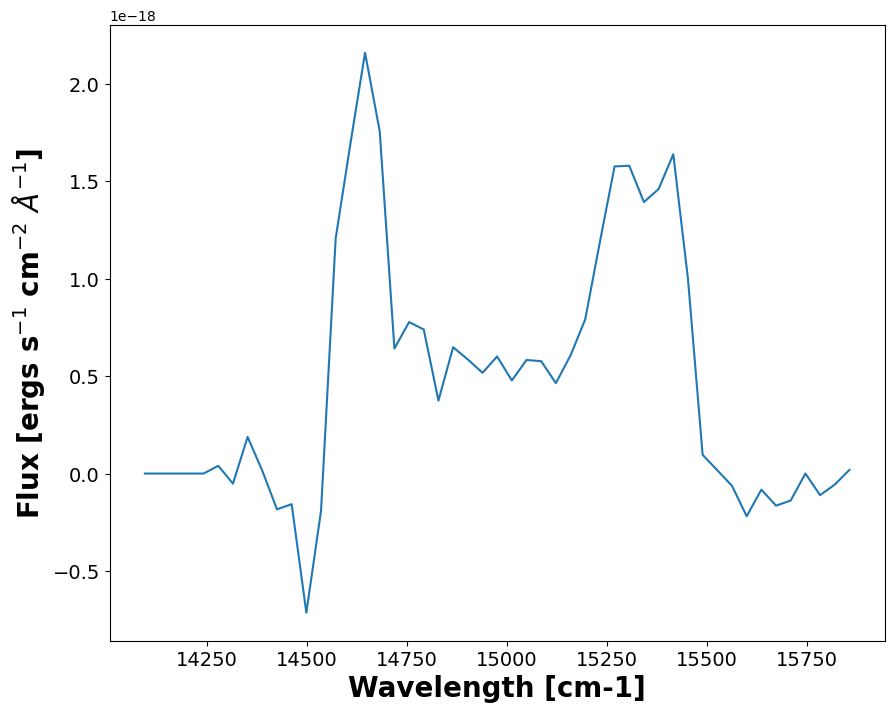

In [5]:
# We use 'mean = True' to take the mean of the emission in the region instead of the sum
bkg_axis, bkg_sky = cube.extract_spectrum_region(cube_dir+'/bkg.reg', mean=True)
lplt.plot_spectrum(bkg_axis, bkg_sky)

We will now fit a single pixel and take a look at the fit. This fit commands has all the same options as all the other commands except for binning :)

In [12]:
# Fit!
axis, sky, fit_dict = cube.fit_pixel(
    ['Halpha', 'NII6548', 'NII6583'],  # lines
    'gaussian',   # fit function
    [1,1,1],  # velocity relationship
    [1,1,1],  # sigma relationship
    1250, 1045,    # x & y coordinate
    bkg=bkg_sky, uncertainty_bool=True
)

<Figure size 640x480 with 0 Axes>

And now we can plot the results

<AxesSubplot: xlabel='Wavelength [cm-1]', ylabel='Flux [ergs s$^{-1}$ cm$^{-2}$ $\\AA^{-1}$]'>

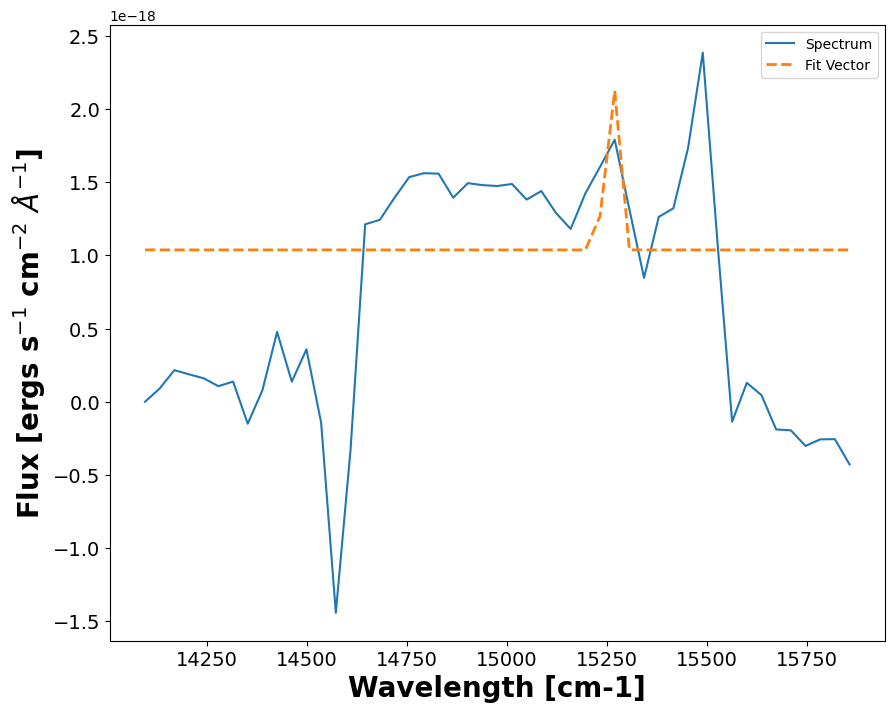

In [13]:
lplt.plot_fit(axis, sky, fit_dict['fit_vector'])

And that is it! Congratulations, you have just used `LUCI`! The fit isn't great, but given the data that isn't surprising :)